In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Given Counter data
data = Counter({('Prokaryote', 'OTHER'): 24532110, ('Environmental', 'OTHER'): 12507330, ('SARS-CoV-2', 'OTHER'): 6475919, ('Metagenome', 'OTHER'): 5631474, ('Fungus', 'OTHER'): 5492637, ('Invertebrate', 'OTHER'): 4285349, ('Prokaryote', 'WGS/WGA'): 2881493, ('Human', 'OTHER'): 2793657, ('Plant', 'OTHER'): 2671713, ('Human', 'RNA-Seq'): 2127600, ('Mouse', 'RNA-Seq'): 2021849, ('Vertebrate', 'OTHER'): 1048542, ('Mouse', 'OTHER'): 997542, ('Metagenome', 'WGS/WGA'): 846229, ('Human', 'WGS/WGA'): 827534, ('Plant', 'RNA-Seq'): 618003, ('Prokaryote', 'RNA-Seq'): 606088, ('Plant', 'WGS/WGA'): 531197, ('Mammal', 'OTHER'): 458029, ('Invertebrate', 'RNA-Seq'): 418787, ('Virome', 'OTHER'): 414660, ('Mammal', 'RNA-Seq'): 330294, ('Invertebrate', 'WGS/WGA'): 311189, ('Other', 'WGS/WGA'): 300640, ('Other', 'OTHER'): 294554, ('SARS-CoV-2', 'WGS/WGA'): 285678, ('Environmental', 'RNA-Seq'): 247434, ('Vertebrate', 'RNA-Seq'): 244459, ('Fungus', 'WGS/WGA'): 240797, ('Fungus', 'RNA-Seq'): 214536, ('Vertebrate', 'WGS/WGA'): 208400, ('Mammal', 'WGS/WGA'): 178392, ('Metagenome', 'RNA-Seq'): 158389, ('Environmental', 'WGS/WGA'): 127681, ('Other', 'RNA-Seq'): 84108, ('Virome', 'WGS/WGA'): 70744, ('SARS-CoV-2', 'RNA-Seq'): 64404, ('Mouse', 'WGS/WGA'): 59767, ('Virome', 'RNA-Seq'): 23941})
# Convert Counter to DataFrame
df = pd.DataFrame(list(data.items()), columns=['Category', 'Count'])
df[['Category1', 'Category2']] = pd.DataFrame(df['Category'].tolist(), index=df.index)
df.drop(columns=['Category'], inplace=True)


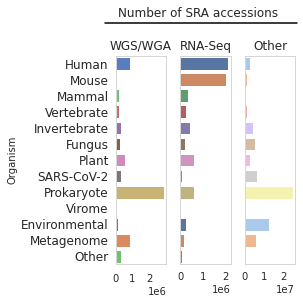

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator, FixedLocator, MultipleLocator

# Determine the order of organisms based on the total counts
#order = df.groupby('Category1')['Count'].sum().sort_values(ascending=False).index

# Define the desired order
desired_order = ['Human', 'Mouse', 'Mammal', 'Vertebrate', 'Invertebrate',  'Fungus', 'Plant', 'SARS-CoV-2',  'Prokaryote', 'Virome', 'Environmental', 'Metagenome',
                 'Other']
df['Category1'] = pd.Categorical(df['Category1'], categories=desired_order, ordered=True)
grouped_counts = df.groupby('Category1')['Count'].sum()
order = grouped_counts.reindex(desired_order).index

# Set the background to white
sns.set_style("whitegrid")
# Plotting
plt.figure(figsize=(4.3, 4.3))

# Subplot for 'WGS/WGA'
plt.subplot(1, 3, 1)
sns.barplot(x='Count', y='Category1', data=df[df['Category2'] == 'WGS/WGA'], palette='muted', order=order)
plt.title('WGS/WGA')
plt.xlabel('')
plt.ylabel('Organism')
plt.yticks(fontsize=12)

# Increase density of x-ticks
#plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=3,integer=True, prune='lower'))
plt.gca().xaxis.set_major_locator(FixedLocator([0,1000000,2000000]))
plt.gca().tick_params(axis='x', which='major', length=6, width=5, direction='out')  # Customize the major ticks
plt.gca().xaxis.grid(False)  # Remove vertical grid lines

# Subplot for 'RNA-Seq'
plt.subplot(1, 3, 2)
sns.barplot(x='Count', y='Category1', data=df[df['Category2'] == 'RNA-Seq'], palette='deep', order=order)
plt.title('RNA-Seq')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])

plt.gca().xaxis.set_major_locator(FixedLocator([0,1000000,2000000]))
#plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, nbins=3, prune='lower'))
plt.gca().xaxis.grid(False)  # Remove vertical grid lines

# Subplot for 'OTHER'
plt.subplot(1, 3, 3)
sns.barplot(x='Count', y='Category1', data=df[df['Category2'] == 'OTHER'], palette='pastel', order=order)
plt.title('Other')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])

plt.gca().xaxis.set_major_locator(FixedLocator([0,10000000,20000000]))
#plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=3,integer=True, prune='lower'))
plt.gca().xaxis.grid(False)  # Remove vertical grid lines

# Adding a horizontal line above the subplots
line = plt.Line2D([0.35, 0.97], [0.92, 0.92], color='black', linewidth=1.5, transform=plt.gcf().transFigure, clip_on=False)
plt.gcf().add_artist(line)
plt.gcf().text(0.65,0.95, 'Number of SRA accessions', fontsize=12, #weight='bold', 
               ha='center', va='center')

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

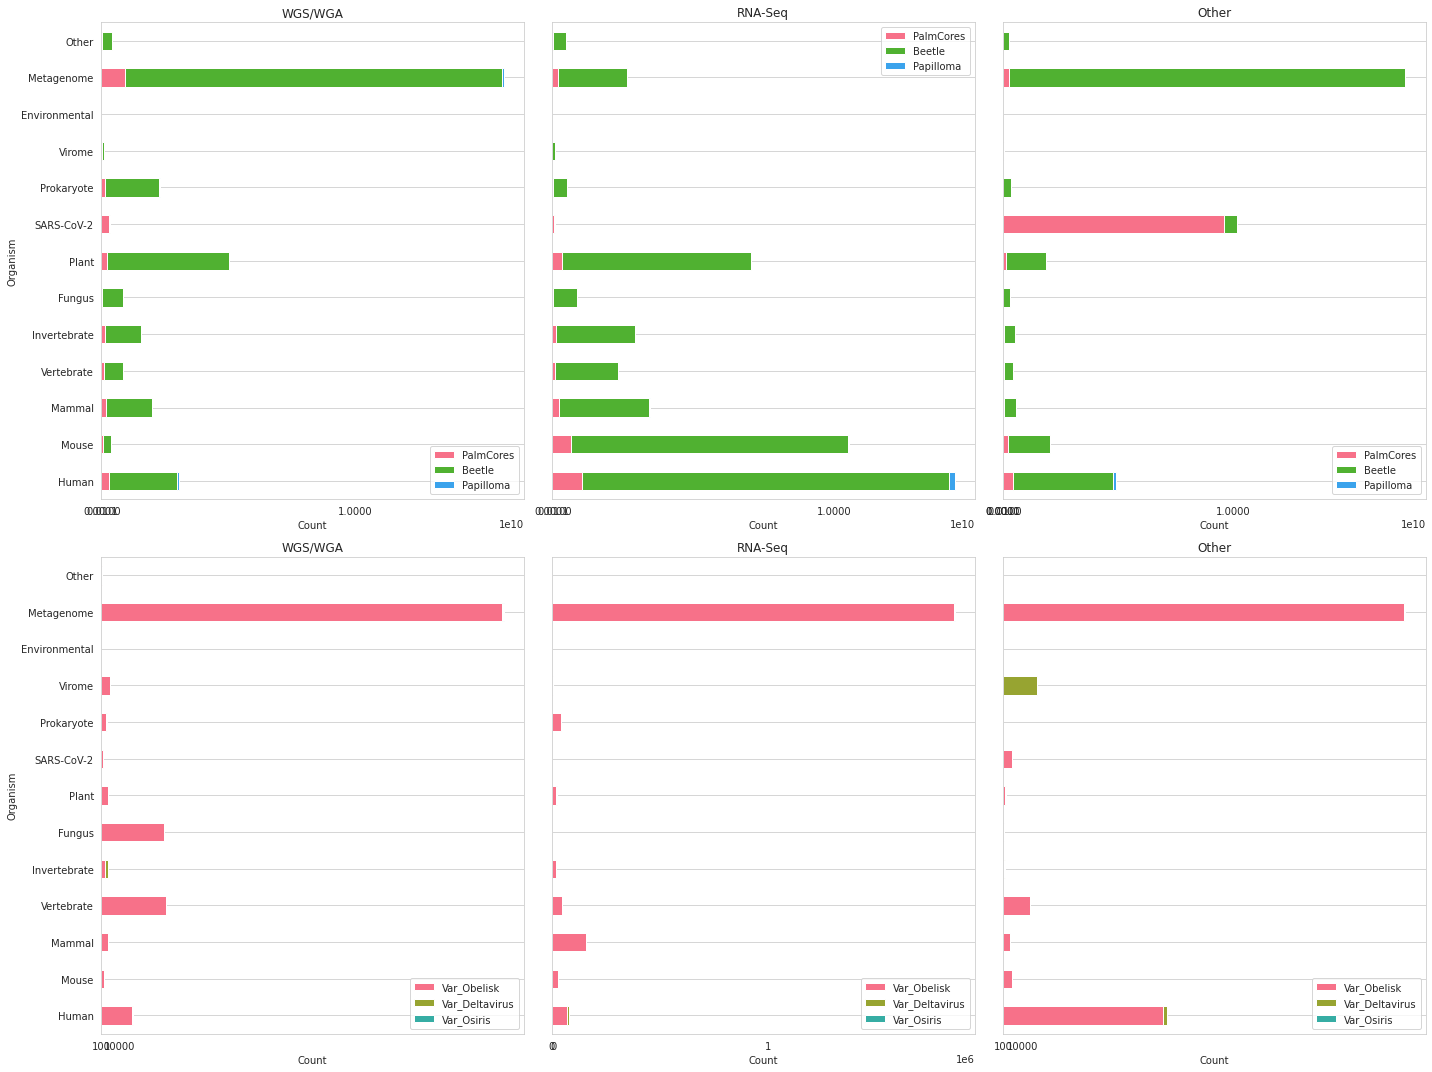

In [196]:
palmcores_counter =  {('Prokaryote', 'WGS/WGA'): 177285018, ('Human', 'OTHER'): 449625871, ('Metagenome', 'OTHER'): 272954821, ('Plant', 'WGS/WGA'): 254057206, ('Mouse', 'OTHER'): 218091520, ('Prokaryote', 'OTHER'): 18779186, ('Vertebrate', 'OTHER'): 51882542, ('Plant', 'OTHER'): 137977029, ('Mammal', 'WGS/WGA'): 215672097, ('Mouse', 'WGS/WGA'): 74027111, ('Other', 'WGS/WGA'): 51954452, ('Human', 'WGS/WGA'): 313726697, ('Vertebrate', 'WGS/WGA'): 113179229, ('Invertebrate', 'OTHER'): 43764023, ('Metagenome', 'WGS/WGA'): 964130982, ('Plant', 'RNA-Seq'): 377827837, ('Vertebrate', 'RNA-Seq'): 110250064, ('Virome', 'WGS/WGA'): 41375236, ('Human', 'RNA-Seq'): 1079140526, ('Virome', 'OTHER'): 33289174, ('Mammal', 'OTHER'): 64915529, ('Fungus', 'OTHER'): 15016661, ('Invertebrate', 'RNA-Seq'): 164568279, ('Other', 'OTHER'): 17700489, ('Invertebrate', 'WGS/WGA'): 169354895, ('Mammal', 'RNA-Seq'): 257305416, ('Other', 'RNA-Seq'): 31913959, ('Mouse', 'RNA-Seq'): 674516863, ('Metagenome', 'RNA-Seq'): 235178081, ('Fungus', 'RNA-Seq'): 39165430, ('Fungus', 'WGS/WGA'): 34116828, ('Virome', 'RNA-Seq'): 25329743, ('Environmental', 'OTHER'): 6371, ('Prokaryote', 'RNA-Seq'): 35003669, ('SARS-CoV-2', 'WGS/WGA'): 331773897, ('SARS-CoV-2', 'OTHER'): 9612787236, ('SARS-CoV-2', 'RNA-Seq'): 77104154, ('Environmental', 'WGS/WGA'): 10452, ('Environmental', 'RNA-Seq'): 14383}
beetle_counter = {('Prokaryote', 'WGS/WGA'): 2119199817, ('Human', 'OTHER'): 4345707067, ('Metagenome', 'OTHER'): 17212416339, ('Plant', 'WGS/WGA'): 4774651669, ('Mouse', 'OTHER'): 1814437405, ('Prokaryote', 'OTHER'): 326454157, ('Vertebrate', 'OTHER'): 373401751, ('Plant', 'OTHER'): 1759506251, ('Mammal', 'WGS/WGA'): 1790781988, ('Mouse', 'WGS/WGA'): 337426553, ('Other', 'WGS/WGA'): 378985248, ('Human', 'WGS/WGA'): 2668975618, ('Vertebrate', 'WGS/WGA'): 750843328, ('Invertebrate', 'OTHER'): 508320036, ('Metagenome', 'WGS/WGA'): 14808294745, ('Plant', 'RNA-Seq'): 6672273326, ('Vertebrate', 'RNA-Seq'): 2223651618, ('Virome', 'WGS/WGA'): 69534808, ('Human', 'RNA-Seq'): 12998081788, ('Virome', 'OTHER'): 30481558, ('Mammal', 'OTHER'): 527323498, ('Fungus', 'OTHER'): 304067619, ('Invertebrate', 'RNA-Seq'): 2779551308, ('Other', 'OTHER'): 251461365, ('Invertebrate', 'WGS/WGA'): 1409540270, ('Mammal', 'RNA-Seq'): 3195040745, ('Other', 'RNA-Seq'): 461770498, ('Mouse', 'RNA-Seq'): 9844028596, ('Metagenome', 'RNA-Seq'): 2425555761, ('Fungus', 'RNA-Seq'): 868327858, ('Fungus', 'WGS/WGA'): 842089909, ('Virome', 'RNA-Seq'): 91878256, ('Environmental', 'OTHER'): 3739115, ('Prokaryote', 'RNA-Seq'): 505164172, ('SARS-CoV-2', 'WGS/WGA'): 36367418, ('SARS-CoV-2', 'OTHER'): 555841380, ('SARS-CoV-2', 'RNA-Seq'): 37161326, ('Environmental', 'WGS/WGA'): 183007, ('Environmental', 'RNA-Seq'): 330402}
Var_Obelisk_counter =  {('Prokaryote', 'WGS/WGA'): 2880, ('Human', 'OTHER'): 80859, ('Metagenome', 'OTHER'): 202380, ('Plant', 'WGS/WGA'): 3722, ('Mouse', 'OTHER'): 4855, ('Prokaryote', 'OTHER'): 218, ('Vertebrate', 'OTHER'): 13586, ('Plant', 'OTHER'): 1317, ('Mammal', 'WGS/WGA'): 3865, ('Mouse', 'WGS/WGA'): 1459, ('Other', 'WGS/WGA'): 389, ('Human', 'WGS/WGA'): 16903, ('Vertebrate', 'WGS/WGA'): 35153, ('Invertebrate', 'OTHER'): 670, ('Metagenome', 'WGS/WGA'): 215709, ('Plant', 'RNA-Seq'): 21606, ('Vertebrate', 'RNA-Seq'): 47583, ('Virome', 'WGS/WGA'): 4699, ('Human', 'RNA-Seq'): 68697, ('Virome', 'OTHER'): 361, ('Mammal', 'OTHER'): 3473, ('Fungus', 'OTHER'): 411, ('Invertebrate', 'RNA-Seq'): 18200, ('Other', 'OTHER'): 364, ('Invertebrate', 'WGS/WGA'): 2338, ('Mammal', 'RNA-Seq'): 156118, ('Other', 'RNA-Seq'): 2655, ('Mouse', 'RNA-Seq'): 27029, ('Metagenome', 'RNA-Seq'): 1861019, ('Fungus', 'RNA-Seq'): 1528, ('Fungus', 'WGS/WGA'): 34109, ('Virome', 'RNA-Seq'): 4061, ('Environmental', 'OTHER'): 0, ('Prokaryote', 'RNA-Seq'): 41856, ('SARS-CoV-2', 'WGS/WGA'): 1213, ('SARS-CoV-2', 'OTHER'): 4489, ('SARS-CoV-2', 'RNA-Seq'): 2442, ('Environmental', 'WGS/WGA'): 0, ('Environmental', 'RNA-Seq'): 1}
Var_Deltavirus_counter =  {('Prokaryote', 'WGS/WGA'): 389, ('Human', 'OTHER'): 1859, ('Metagenome', 'OTHER'): 413, ('Plant', 'WGS/WGA'): 49, ('Mouse', 'OTHER'): 45, ('Prokaryote', 'OTHER'): 0, ('Vertebrate', 'OTHER'): 58, ('Plant', 'OTHER'): 404, ('Mammal', 'WGS/WGA'): 4, ('Mouse', 'WGS/WGA'): 0, ('Other', 'WGS/WGA'): 0, ('Human', 'WGS/WGA'): 227, ('Vertebrate', 'WGS/WGA'): 16, ('Invertebrate', 'OTHER'): 410, ('Metagenome', 'WGS/WGA'): 665, ('Plant', 'RNA-Seq'): 42, ('Vertebrate', 'RNA-Seq'): 1836, ('Virome', 'WGS/WGA'): 66, ('Human', 'RNA-Seq'): 10936, ('Virome', 'OTHER'): 16816, ('Mammal', 'OTHER'): 3, ('Fungus', 'OTHER'): 25, ('Invertebrate', 'RNA-Seq'): 2011, ('Other', 'OTHER'): 13, ('Invertebrate', 'WGS/WGA'): 1430, ('Mammal', 'RNA-Seq'): 631, ('Other', 'RNA-Seq'): 10, ('Mouse', 'RNA-Seq'): 90, ('Metagenome', 'RNA-Seq'): 1495, ('Fungus', 'RNA-Seq'): 0, ('Fungus', 'WGS/WGA'): 1, ('Virome', 'RNA-Seq'): 491, ('Environmental', 'OTHER'): 0, ('Prokaryote', 'RNA-Seq'): 0, ('SARS-CoV-2', 'WGS/WGA'): 0, ('SARS-CoV-2', 'OTHER'): 0, ('SARS-CoV-2', 'RNA-Seq'): 0, ('Environmental', 'WGS/WGA'): 0, ('Environmental', 'RNA-Seq'): 0}
Var_Osiris_counter = {('Prokaryote', 'WGS/WGA'): 1, ('Human', 'OTHER'): 7, ('Metagenome', 'OTHER'): 137, ('Plant', 'WGS/WGA'): 117, ('Mouse', 'OTHER'): 1, ('Prokaryote', 'OTHER'): 0, ('Vertebrate', 'OTHER'): 2, ('Plant', 'OTHER'): 6, ('Mammal', 'WGS/WGA'): 4, ('Mouse', 'WGS/WGA'): 2, ('Other', 'WGS/WGA'): 0, ('Human', 'WGS/WGA'): 5, ('Vertebrate', 'WGS/WGA'): 9, ('Invertebrate', 'OTHER'): 6, ('Metagenome', 'WGS/WGA'): 187, ('Plant', 'RNA-Seq'): 286, ('Vertebrate', 'RNA-Seq'): 17, ('Virome', 'WGS/WGA'): 2, ('Human', 'RNA-Seq'): 94, ('Virome', 'OTHER'): 0, ('Mammal', 'OTHER'): 2, ('Fungus', 'OTHER'): 1, ('Invertebrate', 'RNA-Seq'): 133, ('Other', 'OTHER'): 0, ('Invertebrate', 'WGS/WGA'): 9, ('Mammal', 'RNA-Seq'): 8, ('Other', 'RNA-Seq'): 3, ('Mouse', 'RNA-Seq'): 52, ('Metagenome', 'RNA-Seq'): 1026, ('Fungus', 'RNA-Seq'): 887, ('Fungus', 'WGS/WGA'): 0, ('Virome', 'RNA-Seq'): 8, ('Environmental', 'OTHER'): 0, ('Prokaryote', 'RNA-Seq'): 11, ('SARS-CoV-2', 'WGS/WGA'): 0, ('SARS-CoV-2', 'OTHER'): 0, ('SARS-CoV-2', 'RNA-Seq'): 0, ('Environmental', 'WGS/WGA'): 0, ('Environmental', 'RNA-Seq'): 0}
Papilloma_counter = {('Prokaryote', 'WGS/WGA'): 9376328, ('Human', 'OTHER'): 112464431, ('Metagenome', 'OTHER'): 16939314, ('Plant', 'WGS/WGA'): 1063714, ('Mouse', 'OTHER'): 3254772, ('Prokaryote', 'OTHER'): 749683, ('Vertebrate', 'OTHER'): 352097, ('Plant', 'OTHER'): 1099353, ('Mammal', 'WGS/WGA'): 15688654, ('Mouse', 'WGS/WGA'): 268464, ('Other', 'WGS/WGA'): 1581875, ('Human', 'WGS/WGA'): 78876330, ('Vertebrate', 'WGS/WGA'): 464096, ('Invertebrate', 'OTHER'): 533388, ('Metagenome', 'WGS/WGA'): 48846647, ('Plant', 'RNA-Seq'): 2414054, ('Vertebrate', 'RNA-Seq'): 851388, ('Virome', 'WGS/WGA'): 771983, ('Human', 'RNA-Seq'): 199923321, ('Virome', 'OTHER'): 1609359, ('Mammal', 'OTHER'): 3262598, ('Fungus', 'OTHER'): 178183, ('Invertebrate', 'RNA-Seq'): 1533218, ('Other', 'OTHER'): 1512448, ('Invertebrate', 'WGS/WGA'): 1881812, ('Mammal', 'RNA-Seq'): 12198954, ('Other', 'RNA-Seq'): 1021390, ('Mouse', 'RNA-Seq'): 6529337, ('Metagenome', 'RNA-Seq'): 1957169, ('Fungus', 'RNA-Seq'): 284208, ('Fungus', 'WGS/WGA'): 170083, ('Virome', 'RNA-Seq'): 428768, ('Environmental', 'OTHER'): 77, ('Prokaryote', 'RNA-Seq'): 1366337, ('SARS-CoV-2', 'WGS/WGA'): 555665, ('SARS-CoV-2', 'OTHER'): 2569680, ('SARS-CoV-2', 'RNA-Seq'): 242107, ('Environmental', 'WGS/WGA'): 121, ('Environmental', 'RNA-Seq'): 169}

# Convert counters to DataFrame
counters = [palmcores_counter, beetle_counter, Var_Obelisk_counter, Var_Deltavirus_counter, Var_Osiris_counter, Papilloma_counter]
counter_names = ['PalmCores', 'Beetle', 'Var_Obelisk', 'Var_Deltavirus', 'Var_Osiris', 'Papilloma']

dfs = []
for counter, name in zip(counters, counter_names):
    df = pd.DataFrame(list(counter.items()), columns=['Category', name])
    df[['Category1', 'Category2']] = pd.DataFrame(df['Category'].tolist(), index=df.index)
    df = df.drop(columns=['Category'])
    dfs.append(df)

# Merge all data
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on=['Category1', 'Category2'], how='outer')

# Set the desired order
desired_order = ['Human', 'Mouse', 'Mammal', 'Vertebrate', 'Invertebrate', 'Fungus', 'Plant', 'SARS-CoV-2', 'Prokaryote', 'Virome', 'Environmental', 'Metagenome', 'Other']
merged_df['Category1'] = pd.Categorical(merged_df['Category1'], categories=desired_order, ordered=True)
merged_df = merged_df.sort_values('Category1')

# Set the background to white
sns.set_style("whitegrid")

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(20, 15), sharey=True)

# First row: beetle/palmcores data
categories = ['WGS/WGA', 'RNA-Seq', 'OTHER']
titles = ['WGS/WGA', 'RNA-Seq', 'Other']
colors = sns.color_palette("husl", 3)

for ax, category, title in zip(axes[0], categories, titles):
    subset = merged_df[merged_df['Category2'] == category]
    subset = subset.set_index('Category1')
    bars = subset[['PalmCores', 'Beetle', 'Papilloma']].plot(kind='barh', stacked=True, ax=ax, color=colors)
    ax.set_title(title)
    ax.set_xlabel('Count')
    if ax != axes[0][0]:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Organism')
    ax.xaxis.set_major_locator(FixedLocator([1e2, 1e4, 1e6, 1e8, 1e10]))
    ax.grid(False, axis='x')

# Second row: Var_* data
colors_var = sns.color_palette("husl", 4)
var_names = ['Var_Obelisk', 'Var_Deltavirus', 'Var_Osiris']

for ax, category, title in zip(axes[1], categories, titles):
    subset = merged_df[merged_df['Category2'] == category]
    subset = subset.set_index('Category1')
    bars = subset[var_names].plot(kind='barh', stacked=True, ax=ax, color=colors_var)
    ax.set_title(title)
    ax.set_xlabel('Count')
    if ax != axes[1][0]:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Organism')
    ax.xaxis.set_major_locator(FixedLocator([1e2, 1e4, 1e6, 1e8, 1e10]))
    ax.grid(False, axis='x')

# Adjust layout
fig.tight_layout()
plt.show()